In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE

%matplotlib inline

## Load the MIMIC data

In [2]:
df = pd.read_csv('../data/UCI_train_test.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [3]:
df.shape

(5547, 37)

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'tolbutamide', 'tolazamide', 'number_features_medications',
       'diabetesMed_change', 'label'],
      dtype='object')

In [5]:
categorical_columns =['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                      'change', 'diabetesMed','diabetesMed_change']
features_medications = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'tolbutamide', 'tolazamide',]
numerical_columns = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications',
                     'number_outpatient', 'number_emergency','number_inpatient', 'number_diagnoses',
                    'number_features_medications','max_glu_serum', 'A1Cresult',]


In [33]:
X = df[numerical_columns+categorical_columns]

In [34]:
X.shape

(5547, 20)

In [35]:
X= pd.get_dummies(X, columns = ['race', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                      'change', 'diabetesMed','diabetesMed_change'])

In [36]:
X_columns = list(X.columns)
len(X_columns)

38

In [37]:
y = df['label']
y.shape

(5547,)

## Prepare Balanced Data for Machine Learning

In [38]:
# The base line for this dataset
base = df['label'].value_counts(normalize=True)
print(f'The base line is\n{base}')

The base line is
0    0.907518
1    0.092482
Name: label, dtype: float64


In [39]:
# Split the train and test data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [40]:
print(X_train.shape,X_test.shape)

(4160, 38) (1387, 38)


In [41]:
y.value_counts()

0    5034
1     513
Name: label, dtype: int64

In [42]:
y_train.value_counts(normalize=True)

0    0.908413
1    0.091587
Name: label, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

0    0.904831
1    0.095169
Name: label, dtype: float64

In [44]:
# Banlance the train set with SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
print(X_train_sm.shape, y_train_sm.shape)
y_train_sm.value_counts(normalize=True)

(7558, 38) (7558,)


1    0.5
0    0.5
Name: label, dtype: float64

In [45]:
# Banlance the train set with SMOTE
X_test_sm, y_test_sm = sm.fit_sample(X_test, y_test)
print(X_test_sm.shape, y_test_sm.shape)
y_test_sm.value_counts(normalize=True)

(2510, 38) (2510,)


1    0.5
0    0.5
Name: label, dtype: float64

## Machine Learning Classification Models: Logistic Regression

In [18]:
model_lg = LogisticRegression()
model_lg.fit(X_train_sm, y_train_sm)

/Users/susanchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
model_lg = LogisticRegression()
cross_val_acc, train_acc, test_acc, sensitivity, specificity, precision, tp, fp = model_work(model_lg, 
                                                                                             X_train_tfidf,
                                                                                             y_train,
                                                                                             X_test_tfidf,
                                                                                             y_test)

/Users/susanchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [67]:
cross_val_acc, train_acc, test_acc, sensitivity, specificity, precision, tp, fp

(0.9177, 0.9255, 0.9229, 0.0, 0.990728476821192, 0.0, 0, 14)

### The Logistic Regression model kept fail to converge. The results are not reliable. I won't include this model in my model comparison.

## Machine Learning Classification Models: Random Forest

In [54]:
# Model work for balanced data
model_rf1 = RandomForestClassifier(n_estimators=100, max_depth=2)
model_rf1.fit(X_train_sm, y_train_sm)
cross_val_acc1 = round(cross_val_score(model_rf1, X_train_sm, y_train_sm).mean(),4)
train_acc1 = round(model_rf1.score(X_train_sm,y_train_sm),4)
test_acc1 = round(model_rf1.score(X_test_sm,y_test_sm),4)
preds1 = model_rf1.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds1).ravel()
print(f' cross_val_acc = {cross_val_acc1}\n train_acc = {train_acc1} \n test_acc = {test_acc1}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.7906
 train_acc = 0.7797 
 test_acc = 0.7976
 tn, fp, fn, tp (995, 260, 248, 1007)


In [32]:
feature_importance_tup = sorted(zip(map(lambda x: round(x, 4), model_rf1.feature_importances_), numerical_columns), reverse=True)
feature_importance_tup[:30]

[(0.1025, 'A1Cresult'),
 (0.051, 'num_medications'),
 (0.04, 'time_in_hospital'),
 (0.0213, 'number_diagnoses'),
 (0.0112, 'num_lab_procedures'),
 (0.0099, 'number_features_medications'),
 (0.0041, 'max_glu_serum'),
 (0.0036, 'age'),
 (0.0033, 'number_inpatient'),
 (0.0016, 'num_procedures'),
 (0.0008, 'number_outpatient'),
 (0.0005, 'number_emergency')]

In [55]:
model_rf2 = RandomForestClassifier(n_estimators=50, max_depth=4)
model_rf2.fit(X_train_sm, y_train_sm)
cross_val_acc2 = round(cross_val_score(model_rf2, X_train_sm, y_train_sm).mean(),4)
train_acc2 = round(model_rf2.score(X_train_sm,y_train_sm),4)
test_acc2 = round(model_rf2.score(X_test_sm,y_test_sm),4)
preds2 = model_rf2.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds2).ravel()
print(f' cross_val_acc = {cross_val_acc2}\n train_acc = {train_acc2} \n test_acc = {test_acc2}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.8459
 train_acc = 0.8515 
 test_acc = 0.8482
 tn, fp, fn, tp (1091, 164, 217, 1038)


In [73]:
pred_proba_rf = [i[1] for i in model_rf2.predict_proba(X_test_sm)]
pred_rf_df = pd.DataFrame({'true_values': y_test_sm,
                        'pred_probs':pred_proba_rf})

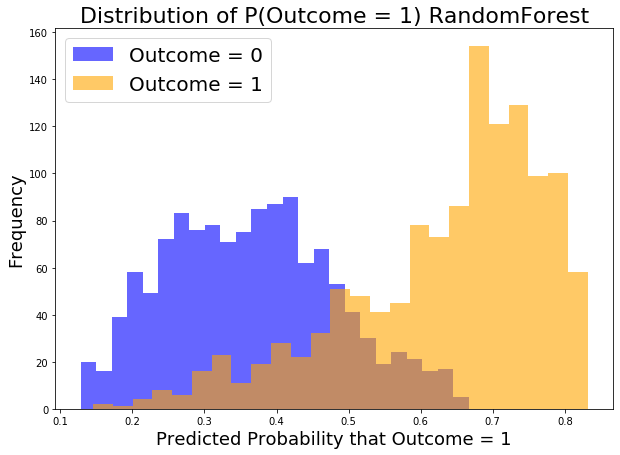

In [74]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_rf_df[pred_rf_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_rf_df[pred_rf_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1) RandomForest', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

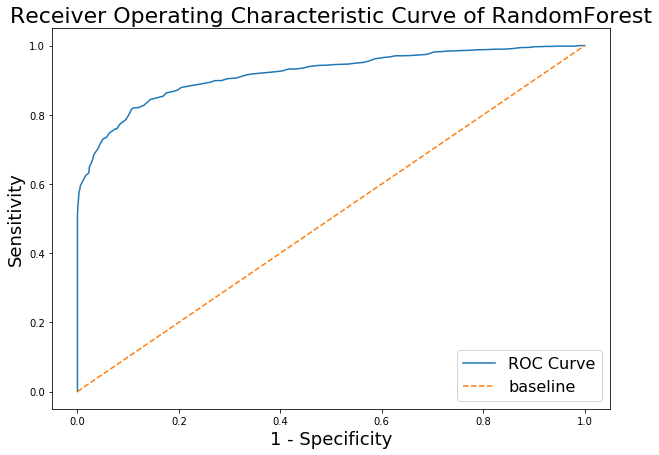

In [79]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 201)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_rf_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_rf_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve of RandomForest', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Machine Learning Classification Models: Multinomial Naive Bayes

In [61]:
# Model work on balanced dataset
model_nb1 = MultinomialNB()
model_nb1.fit(X_train_sm,y_train_sm)
cross_val_acc3 = round(cross_val_score(model_nb1, X_train_sm, y_train_sm).mean(),4)
train_acc3 = round(model_nb1.score(X_train_sm,y_train_sm),4)
test_acc3 = round(model_nb1.score(X_test_sm,y_test_sm),4)
preds3 = model_nb1.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds3).ravel()
print(f' cross_val_acc = {cross_val_acc3}\n train_acc = {train_acc3} \n test_acc = {test_acc3}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.7699
 train_acc = 0.7737 
 test_acc = 0.7665
 tn, fp, fn, tp (982, 273, 313, 942)


In [70]:
pred_proba_nb = [i[1] for i in model_nb1.predict_proba(X_test_sm)]
pred_nb_df = pd.DataFrame({'true_values': y_test_sm,
                        'pred_probs':pred_proba_nb})

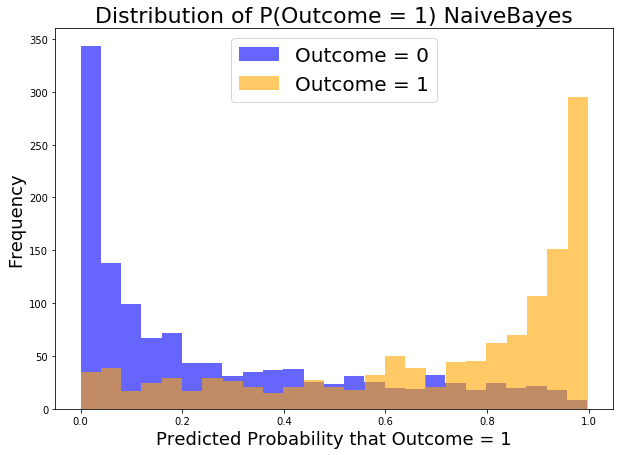

In [72]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_nb_df[pred_nb_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_nb_df[pred_nb_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1) NaiveBayes', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

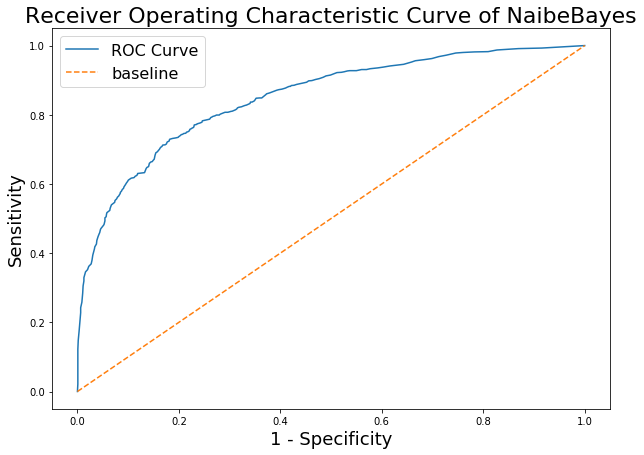

In [78]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 201)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_nb_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_nb_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve of NaibeBayes', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Machine Learning Classification Models: XG Boost

In [63]:
# Mddel work on balanced data
model_xg1 = XGBClassifier()
model_xg1.fit(X_train_sm, y_train_sm)
cross_val_acc4 = round(cross_val_score(model_xg1, X_train_sm, y_train_sm).mean(),4)
train_acc4 = round(model_xg1.score(X_train_sm,y_train_sm),4)
test_acc4 = round(model_xg1.score(X_test_sm,y_test_sm),4)
preds4 = model_xg1.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds4).ravel()
print(f' cross_val_acc = {cross_val_acc4}\n train_acc = {train_acc4} \n test_acc = {test_acc4}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.9291
 train_acc = 0.9372 
 test_acc = 0.9247
 tn, fp, fn, tp (1233, 22, 167, 1088)


In [75]:
pred_proba_xg = [i[1] for i in model_xg1.predict_proba(X_test_sm)]
pred_xg_df = pd.DataFrame({'true_values': y_test_sm,
                        'pred_probs':pred_proba_xg})

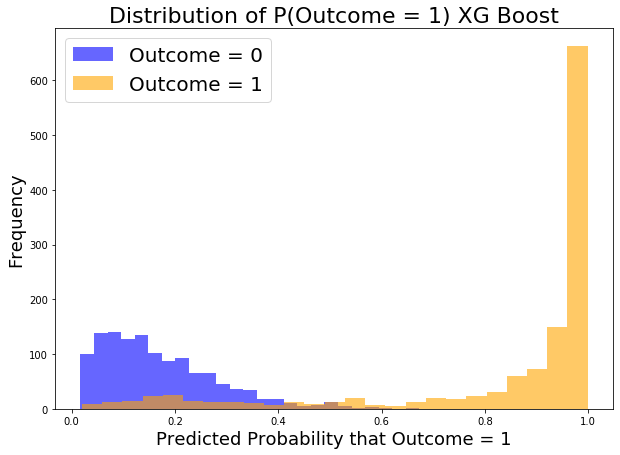

In [76]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_xg_df[pred_xg_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_xg_df[pred_xg_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1) XG Boost', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

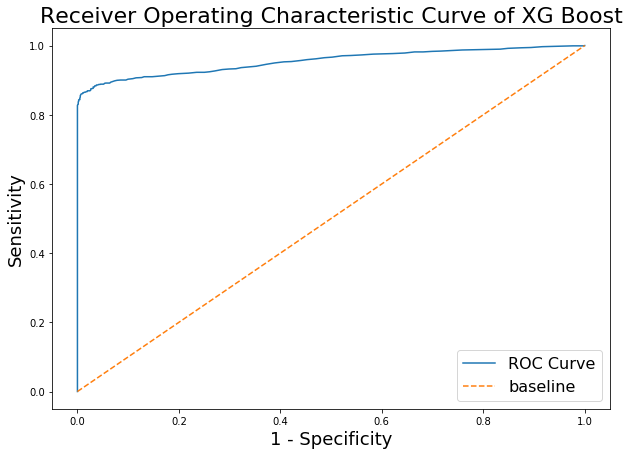

In [77]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 201)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_xg_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_xg_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve of XG Boost', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [60]:
feature_importance_xg = sorted(zip(map(lambda x: round(x, 4), model_xg1.feature_importances_), X_columns), reverse=True)
feature_importance_xg[:15]

[(0.1029, 'diabetesMed_No'),
 (0.085, 'admission_type_id_Elective'),
 (0.0668, 'discharge_disposition_id_home'),
 (0.0639, 'race_Caucasian'),
 (0.0498, 'A1Cresult'),
 (0.049, 'diabetesMed_Yes'),
 (0.0472, 'change_No'),
 (0.0468, 'admission_source_id_referral'),
 (0.0455, 'change_Ch'),
 (0.0403, 'discharge_disposition_id_home_care'),
 (0.0373, 'discharge_disposition_id_transferred'),
 (0.0368, 'race_AfricanAmerican'),
 (0.0329, 'gender'),
 (0.0309, 'discharge_disposition_id_unknown'),
 (0.0292, 'admission_type_id_Emergency')]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


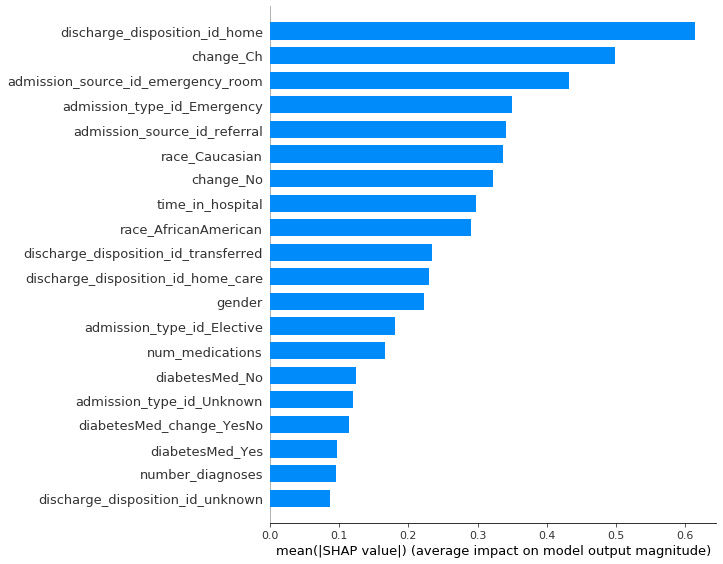

In [44]:
import shap
shap_values = shap.TreeExplainer(model_xg1).shap_values(X_train_sm)
shap.summary_plot(shap_values, X_train_sm, plot_type="bar", feature_names=X_columns)

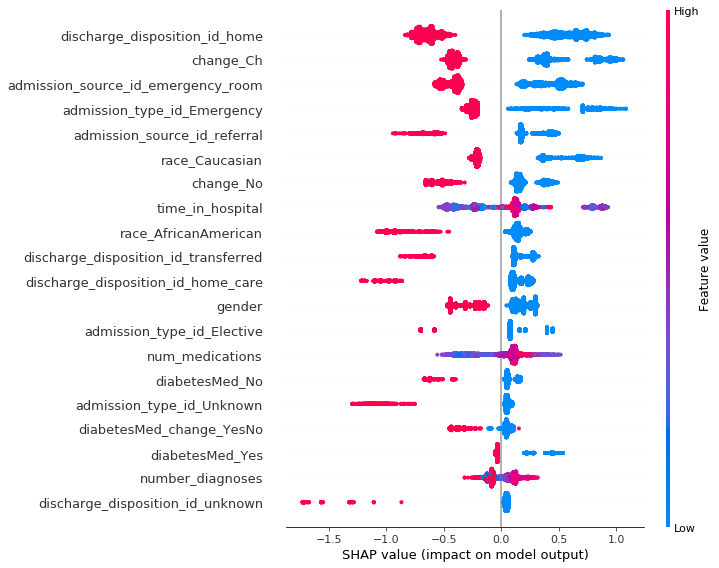

In [45]:
shap.summary_plot(shap_values, X_train_sm,feature_names=X_columns)

## Machine Learning Classification Models: SVM

In [65]:
# Model wrok on balanced train set and test set
model_svc1 =SVC(C = 1.0)
model_svc1.fit(X_train_sm, y_train_sm)
cross_val_acc5 = round(cross_val_score(model_svc1, X_train_sm, y_train_sm).mean(),4)
train_acc5 = round(model_svc1.score(X_train_sm,y_train_sm),4)
test_acc5 = round(model_svc1.score(X_test_sm,y_test_sm),4)
preds5 = model_svc1.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds5).ravel()
print(f' cross_val_acc = {cross_val_acc5}\n train_acc = {train_acc5} \n test_acc = {test_acc5}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.7118
 train_acc = 0.7423 
 test_acc = 0.7199
 tn, fp, fn, tp (823, 432, 271, 984)


In [ ]:
# For support vector machine, it won't predict the probability, so can't draw the AUC-ROC curve

## Machine Learning Classification Models: FFNN(feed forward neutral network)

In [66]:
n_input = X_train_sm.shape[1]
n_input

38

In [67]:
model_ffnn = Sequential()

lam=0.09
model_ffnn.add(Dense(n_input,
                   input_dim = n_input,
                   activation = 'relu',
                   kernel_regularizer = regularizers.l2(lam)
                       ))
model_dropout = Sequential()
model_dropout.add(Dropout(0.5))
model_ffnn.add(Dense(1,
                   activation='sigmoid'))

model_ffnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])
early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta=0, 
                           patience=5,
                           mode='auto')
history_all = model_ffnn.fit(X_train_sm,
                          y_train_sm,
                          validation_data=(X_test_sm,y_test_sm),
                          epochs=10,
                          batch_size=None,
                          verbose=2,
                          callbacks=[early_stop]
                          )

Train on 7558 samples, validate on 2510 samples
Epoch 1/10
 - 1s - loss: 2.8237 - acc: 0.5648 - val_loss: 1.0963 - val_acc: 0.7044
Epoch 2/10
 - 0s - loss: 0.8861 - acc: 0.7235 - val_loss: 0.7747 - val_acc: 0.7677
Epoch 3/10
 - 0s - loss: 0.7518 - acc: 0.7568 - val_loss: 0.7595 - val_acc: 0.7032
Epoch 4/10
 - 0s - loss: 0.7209 - acc: 0.7591 - val_loss: 0.6993 - val_acc: 0.7757
Epoch 5/10
 - 0s - loss: 0.7043 - acc: 0.7565 - val_loss: 0.7209 - val_acc: 0.6777
Epoch 6/10
 - 0s - loss: 0.6927 - acc: 0.7505 - val_loss: 0.6792 - val_acc: 0.7972
Epoch 7/10
 - 0s - loss: 0.6794 - acc: 0.7551 - val_loss: 0.6641 - val_acc: 0.7610
Epoch 8/10
 - 0s - loss: 0.6675 - acc: 0.7599 - val_loss: 0.6539 - val_acc: 0.7940
Epoch 9/10
 - 0s - loss: 0.6472 - acc: 0.7800 - val_loss: 0.6311 - val_acc: 0.7960
Epoch 10/10
 - 0s - loss: 0.6392 - acc: 0.7801 - val_loss: 0.6185 - val_acc: 0.7940


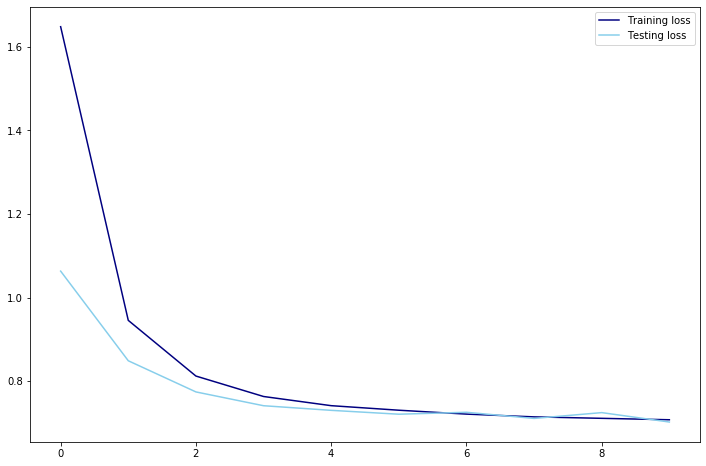

In [54]:
train_loss_all = history_all.history['loss']
test_loss_all = history_all.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss_all, label='Training loss', color='navy')
plt.plot(test_loss_all, label='Testing loss', color='skyblue')
plt.legend();

In [68]:
history_all.history['acc'][-1], history_all.history['val_acc'][-1]

(0.7801006, 0.7940239310264587)